# Uber Data Analysis

**Importing Libraries**

In [ ]:
library(ggplot2)
library(ggthemes)
library(lubridate)
library(dplyr)
library(tidyr)
library(DT)
library(scales)
library(RColorBrewer)

**Importing dataset**

In [ ]:
apr_data <- read.csv("/content/uber-raw-data-apr14.csv")
may_data <- read.csv("/content/uber-raw-data-may14.csv")
jun_data <- read.csv("/content/uber-raw-data-jun14.csv")
jul_data <- read.csv("/content/uber-raw-data-jul14.csv")
aug_data <- read.csv("/content/uber-raw-data-aug14.csv")
sep_data <- read.csv("/content/uber-raw-data-sep14.csv")

###**Preprocessing**

In [ ]:
data_2014 <- rbind(apr_data,may_data, jun_data, jul_data, aug_data, sep_data)

In [ ]:
data_2014$Date.Time <- as.POSIXct(data_2014$Date.Time, format = "%m/%d/%Y %H:%M:%S")

In [ ]:
data_2014$Time <- format(as.POSIXct(data_2014$Date.Time, format = "%m/%d/%Y %H:%M:%S"), format="%H:%M:%S")

In [ ]:
data_2014$Date.Time <- ymd_hms(data_2014$Date.Time)

In [ ]:
data_2014$day <- factor(day(data_2014$Date.Time))
data_2014$month <- factor(month(data_2014$Date.Time, label = TRUE))
data_2014$year <- factor(year(data_2014$Date.Time))
data_2014$dayofweek <- factor(wday(data_2014$Date.Time, label = TRUE))

In [ ]:
data_2014$hour <- factor(hour(hms(data_2014$Time)))
data_2014$minute <- factor(minute(hms(data_2014$Time)))
data_2014$second <- factor(second(hms(data_2014$Time)))

In [ ]:
head(data_2014)

,Date.Time,Lat,Lon,Base,Time,day,month,year,dayofweek,hour,minute,second
,<dttm>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<ord>,<fct>,<ord>,<fct>,<fct>,<fct>
1,2014-04-01 00:11:00,40.7690,-73.9549,B02512,00:11:00,1,Apr,2014,Tue,0,11,0
2,2014-04-01 00:17:00,40.7267,-74.0345,B02512,00:17:00,1,Apr,2014,Tue,0,17,0
3,2014-04-01 00:21:00,40.7316,-73.9873,B02512,00:21:00,1,Apr,2014,Tue,0,21,0
4,2014-04-01 00:28:00,40.7588,-73.9776,B02512,00:28:00,1,Apr,2014,Tue,0,28,0
5,2014-04-01 00:33:00,40.7594,-73.9722,B02512,00:33:00,1,Apr,2014,Tue,0,33,0
6,2014-04-01 00:33:00,40.7383,-74.0403,B02512,00:33:00,1,Apr,2014,Tue,0,33,0


## **EDA**

## Trips by the Hour in a Day

In [ ]:
hour_data <- data_2014 %>% group_by(hour) %>% dplyr::summarize(Total = n())

In [ ]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

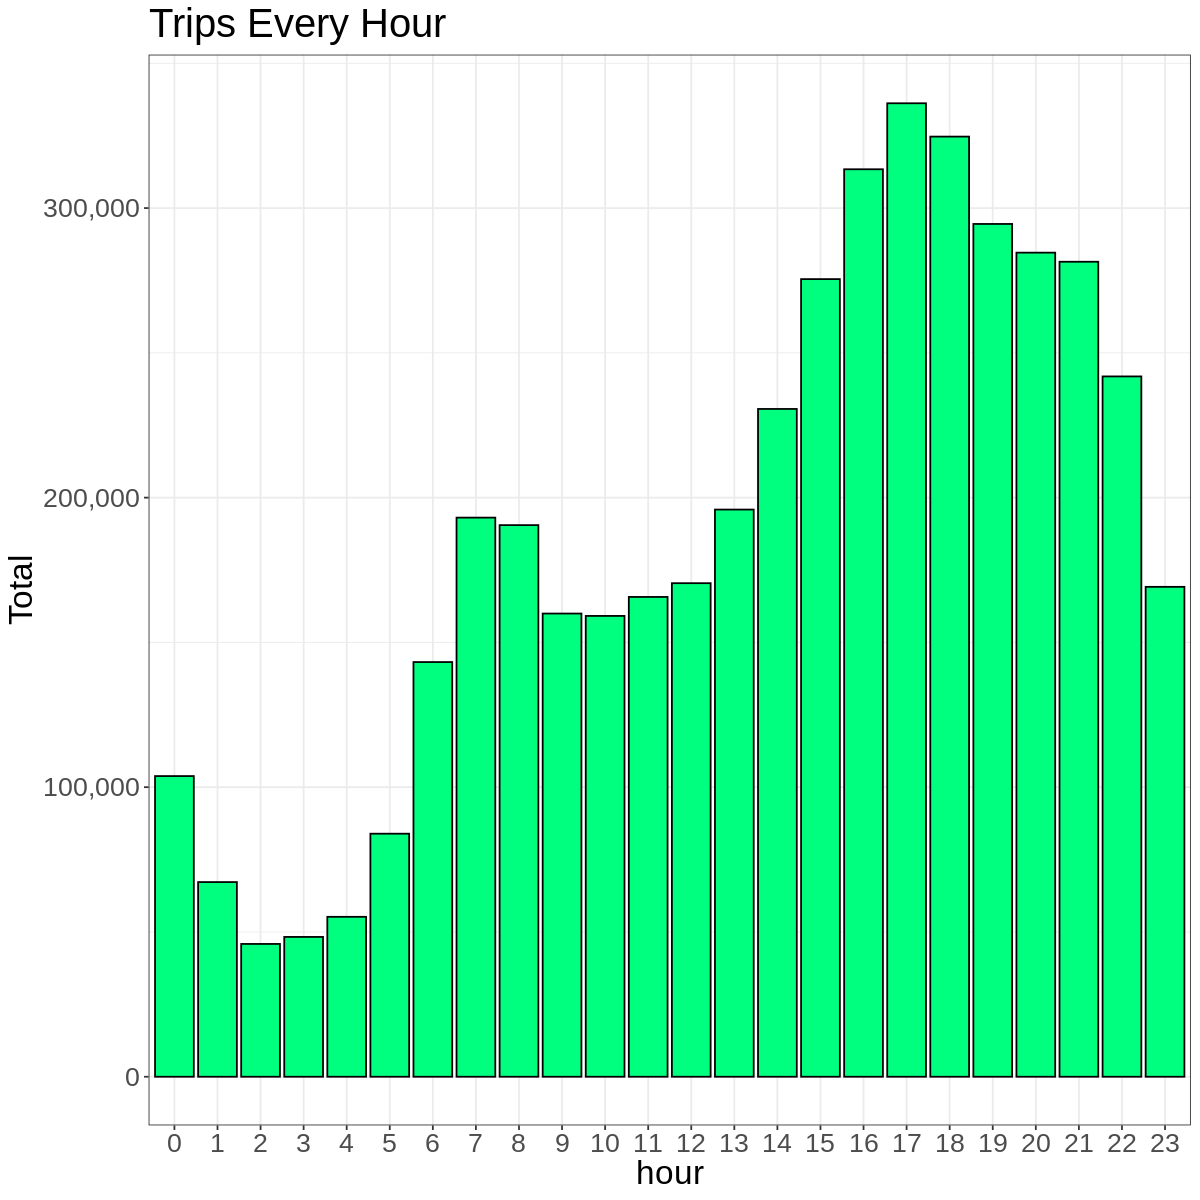

In [ ]:
fig(10,10)
ggplot(hour_data, aes(hour, Total)) + 
geom_bar(stat = "identity", fill = "#00FF7F", color = "black") +
ggtitle("Trips Every Hour") + 
theme_bw() +
theme(legend.position = "none",text = element_text(size = 20)) + 
scale_y_continuous(labels = comma)

 In the resulting visualizations, we can understand how the number of passengers fares throughout the day. We observe that the number of trips are higher in the evening around 5:00 and 6:00 PM.

In [ ]:
month_hour <- data_2014 %>% group_by(month, hour) %>% dplyr::summarize(Total = n())

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.



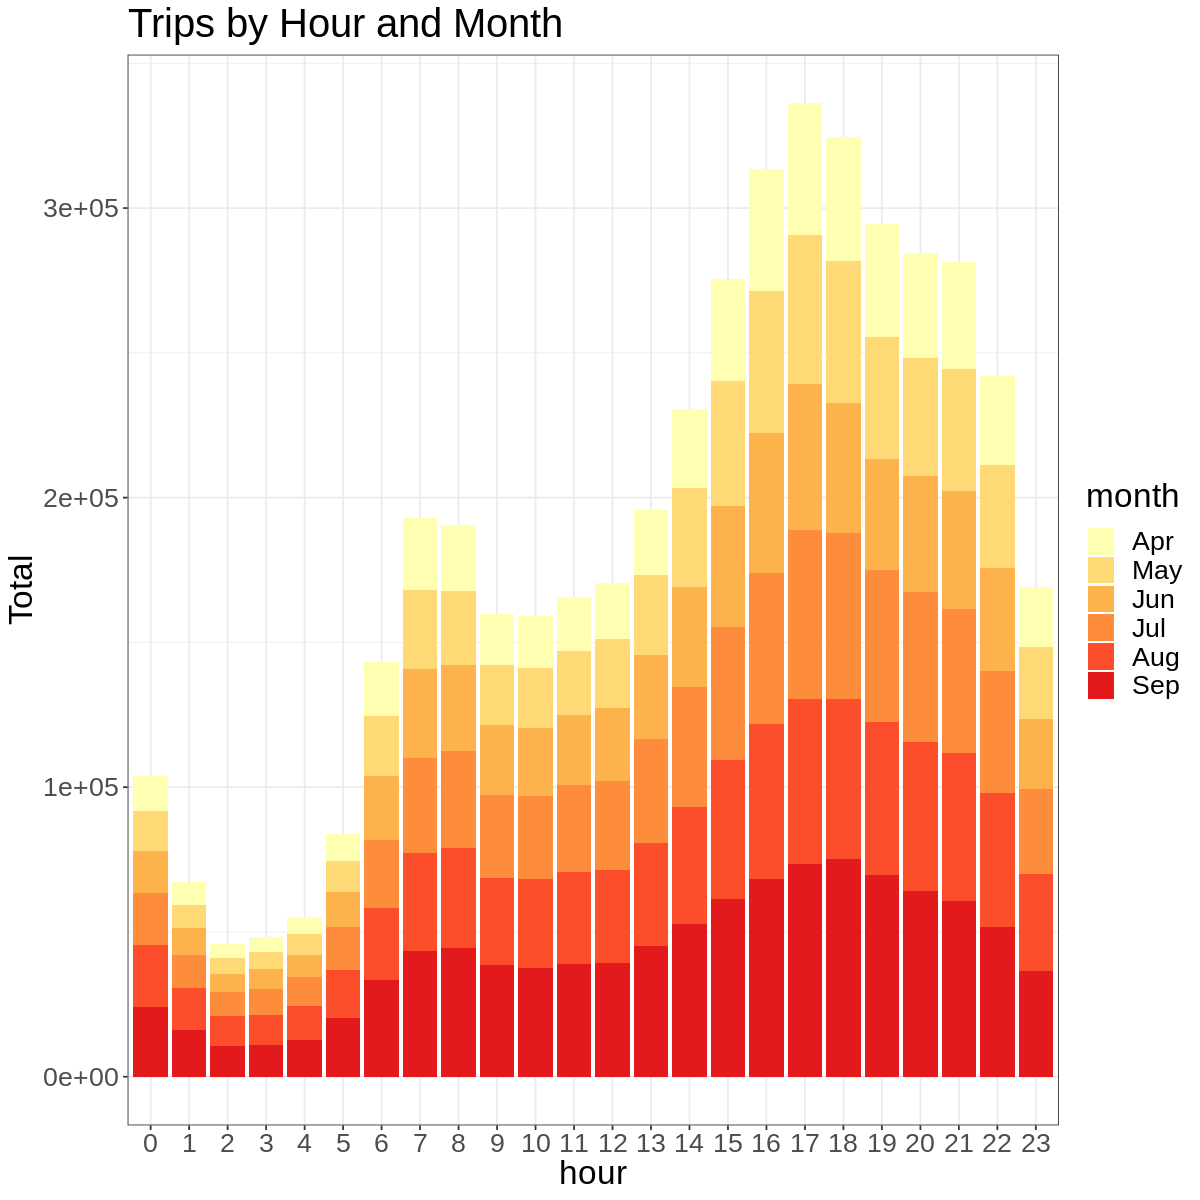

In [ ]:
fig(10,10)
ggplot(month_hour, aes(hour, Total, fill = month)) +
geom_bar(stat = "identity") +
ggtitle("Trips by Hour and Month") + 
theme_bw() + 
theme(text = element_text(size = 20)) + 
scale_fill_manual(values = brewer.pal(n = 7, name = "YlOrRd"))

## Trips during every day of the month

From the resulting visualization that 30th of the month had the highest trips in the year which is mostly contributed by the month of April.

In [ ]:
day_group <- data_2014 %>% group_by(day) %>% dplyr::summarize(Total = n())

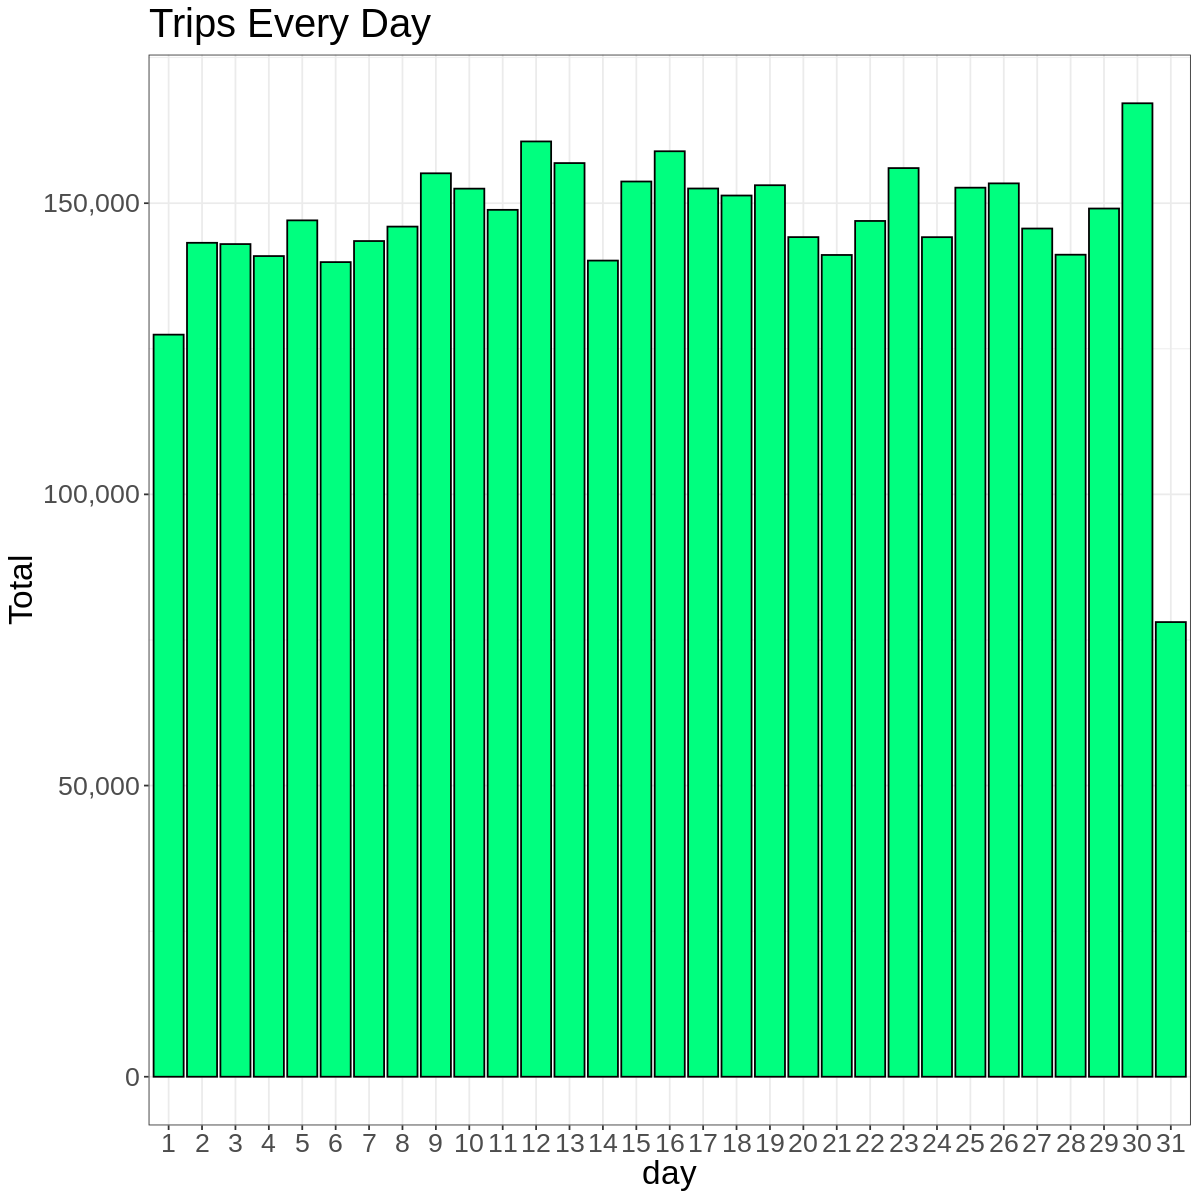

In [ ]:
fig(10,10)
ggplot(day_group, aes(day,Total)) + 
geom_bar(stat = "identity", fill = "#00ff7f", color = 'black') + 
ggtitle("Trips Every Day") +
theme_bw() + 
theme(legend.position = "none", text = element_text(size = 20)) + 
scale_y_continuous(labels = comma)

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.



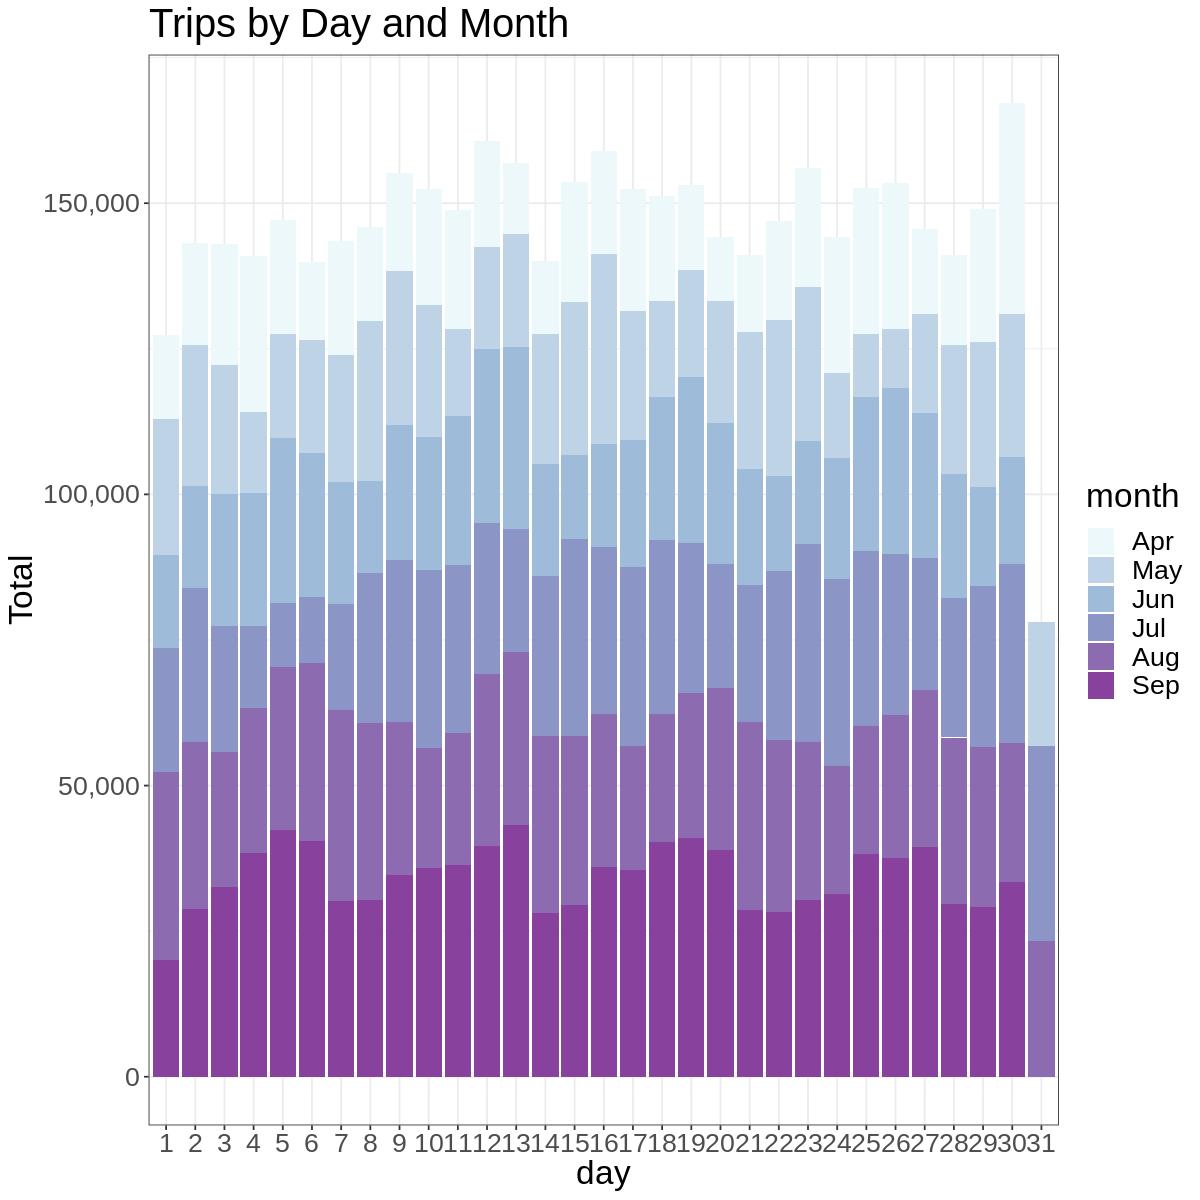

In [ ]:
day_month_group <- data_2014 %>% group_by(month, day) %>% dplyr::summarize(Total = n())
fig(10,10)
ggplot(day_month_group, aes(day, Total, fill=month)) +
geom_bar(stat = "identity") +
ggtitle("Trips by Day and Month") +
theme_bw() + 
theme(text = element_text(size = 20)) +
scale_y_continuous(labels = comma) + 
scale_fill_manual(values = brewer.pal(n = 7, name = "BuPu"))

## Trips taking place during months in a year

In the output visualization, we observe that most trips were made during the month of September. Furthermore, we also obtain visual reports of the number of trips that were made on every day of the week.

In [ ]:
month_group <- data_2014 %>% group_by(month) %>% dplyr::summarize(Total = n())

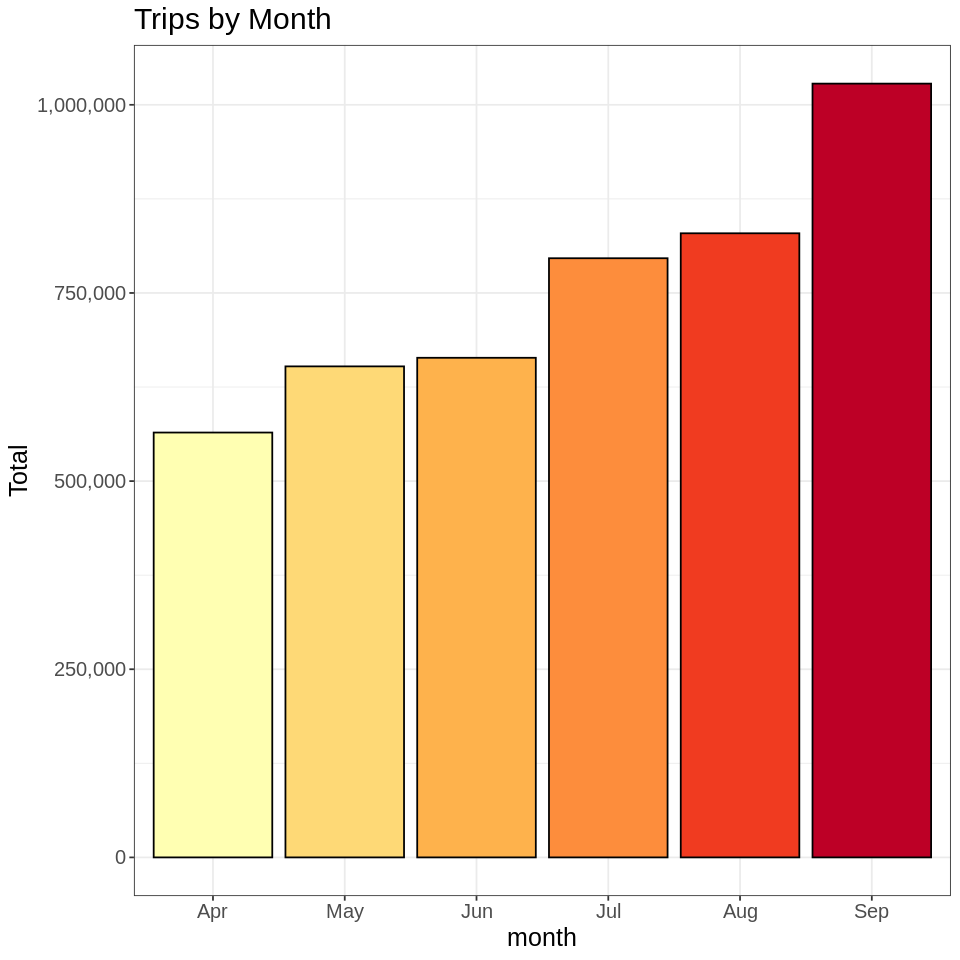

In [ ]:
fig(8,8)
ggplot(month_group, aes(month, Total, fill=month))+
geom_bar(stat = "identity", color = 'black') +
ggtitle("Trips by Month") +
theme_bw() +
theme(legend.position = "none", text = element_text(size = 15)) +
scale_y_continuous(labels = comma) + 
scale_fill_manual(values = brewer.pal(n = 6, name="YlOrRd"))

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.



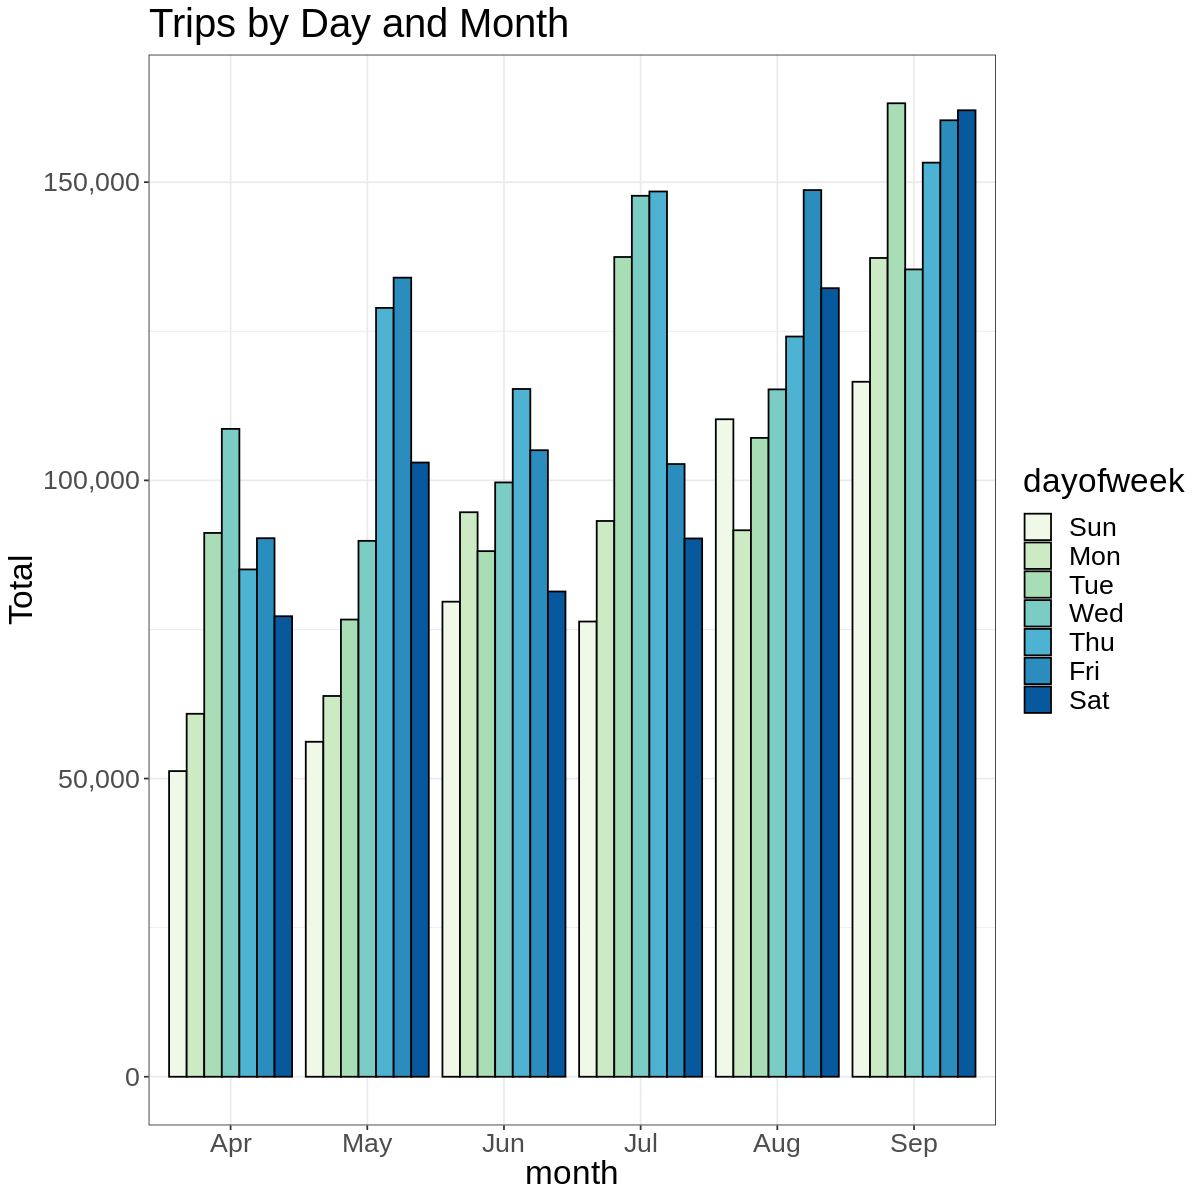

In [ ]:
month_weekday <- data_2014 %>% group_by(month, dayofweek) %>% dplyr::summarize(Total = n())
fig(10,10)
ggplot(month_weekday, aes(month, Total, fill = dayofweek)) + 
geom_bar(stat = "identity", position ="dodge", color="black") +
ggtitle("Trips by Day and Month") +
theme_bw() + 
theme(text = element_text(size = 20)) + 
scale_y_continuous(labels = comma) + 
scale_fill_manual(values = brewer.pal(n=7, name = "GnBu"))

## Finding out the number of Trips by bases

In the following visualization, we plot the number of trips that have been taken by the passengers from each of the bases. There are five bases in all out of which, we observe that B02617 had the highest number of trips. Furthermore, this base had the highest number of trips in the month B02617. Thursday observed highest trips in the three bases – B02598, B02617, B02682.

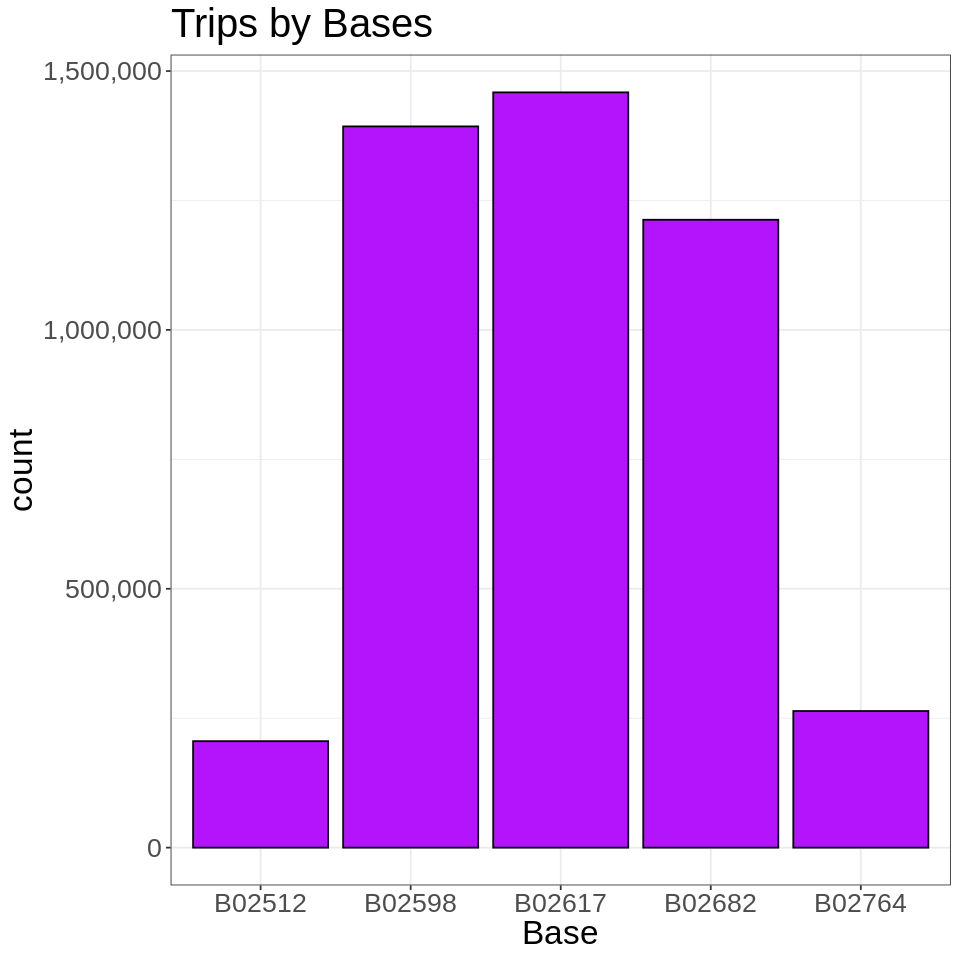

In [ ]:
fig(8,8)
ggplot(data_2014, aes(Base)) +
geom_bar(fill = "#b314fc", color = 'black') +
scale_y_continuous(labels = comma) +
ggtitle("Trips by Bases") + 
theme_bw() +
theme(text = element_text(size = 20))

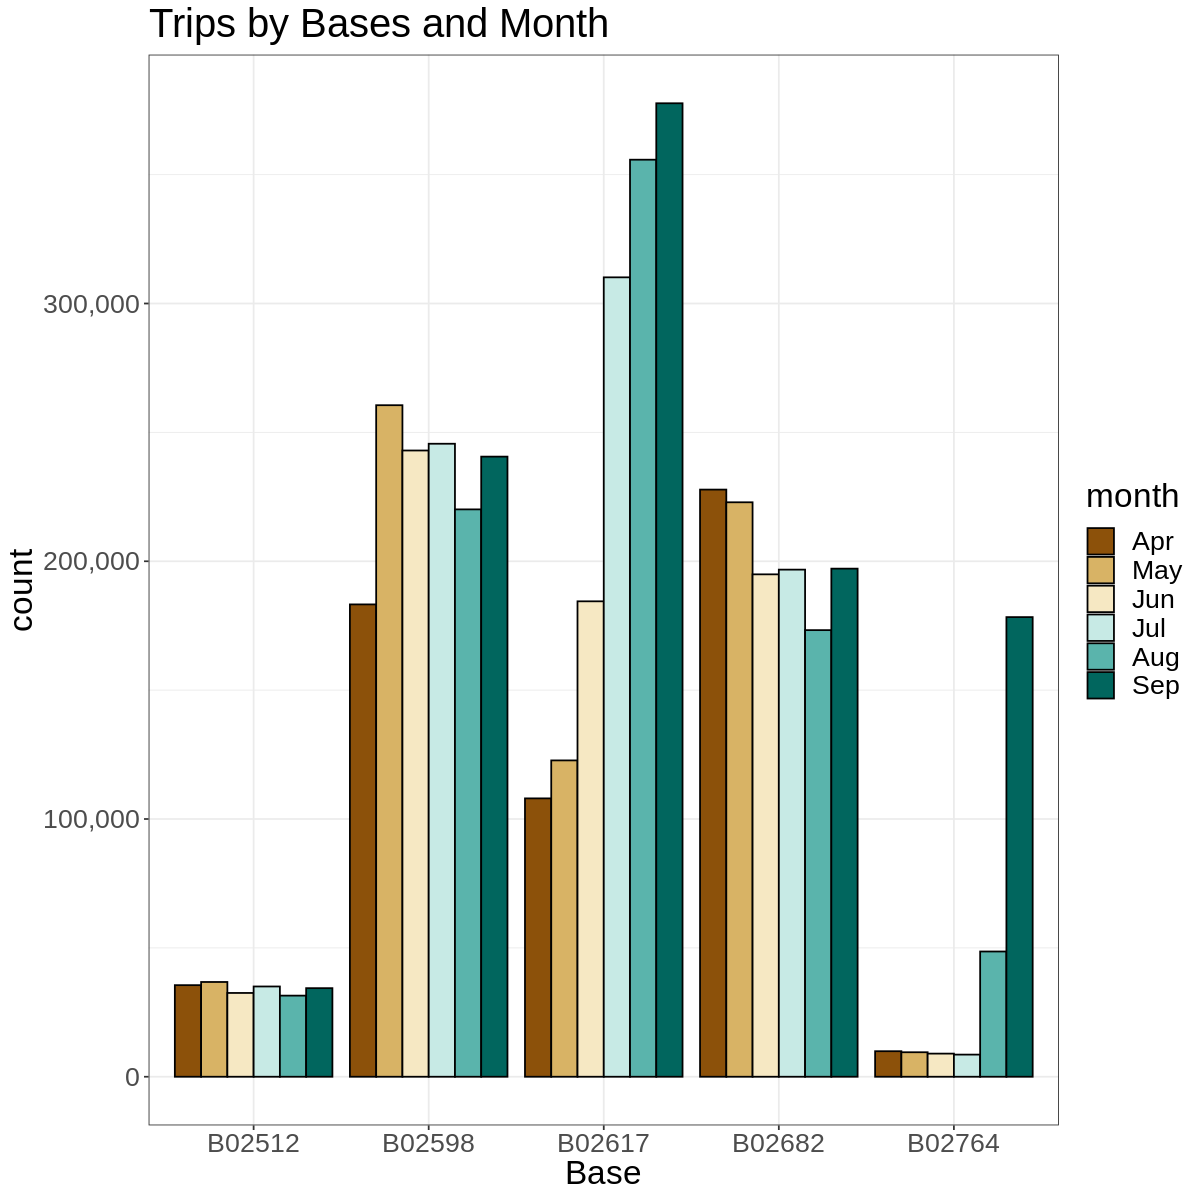

In [ ]:
fig(10,10)
ggplot(data_2014, aes(Base, fill = month)) + 
geom_bar(position = "dodge", color='black') +
scale_y_continuous(labels = comma) +
ggtitle("Trips by Bases and Month") +
theme_bw() +
theme(text = element_text(size = 20)) + 
scale_fill_manual(values = brewer.pal(n = 6, name = 'BrBG'))

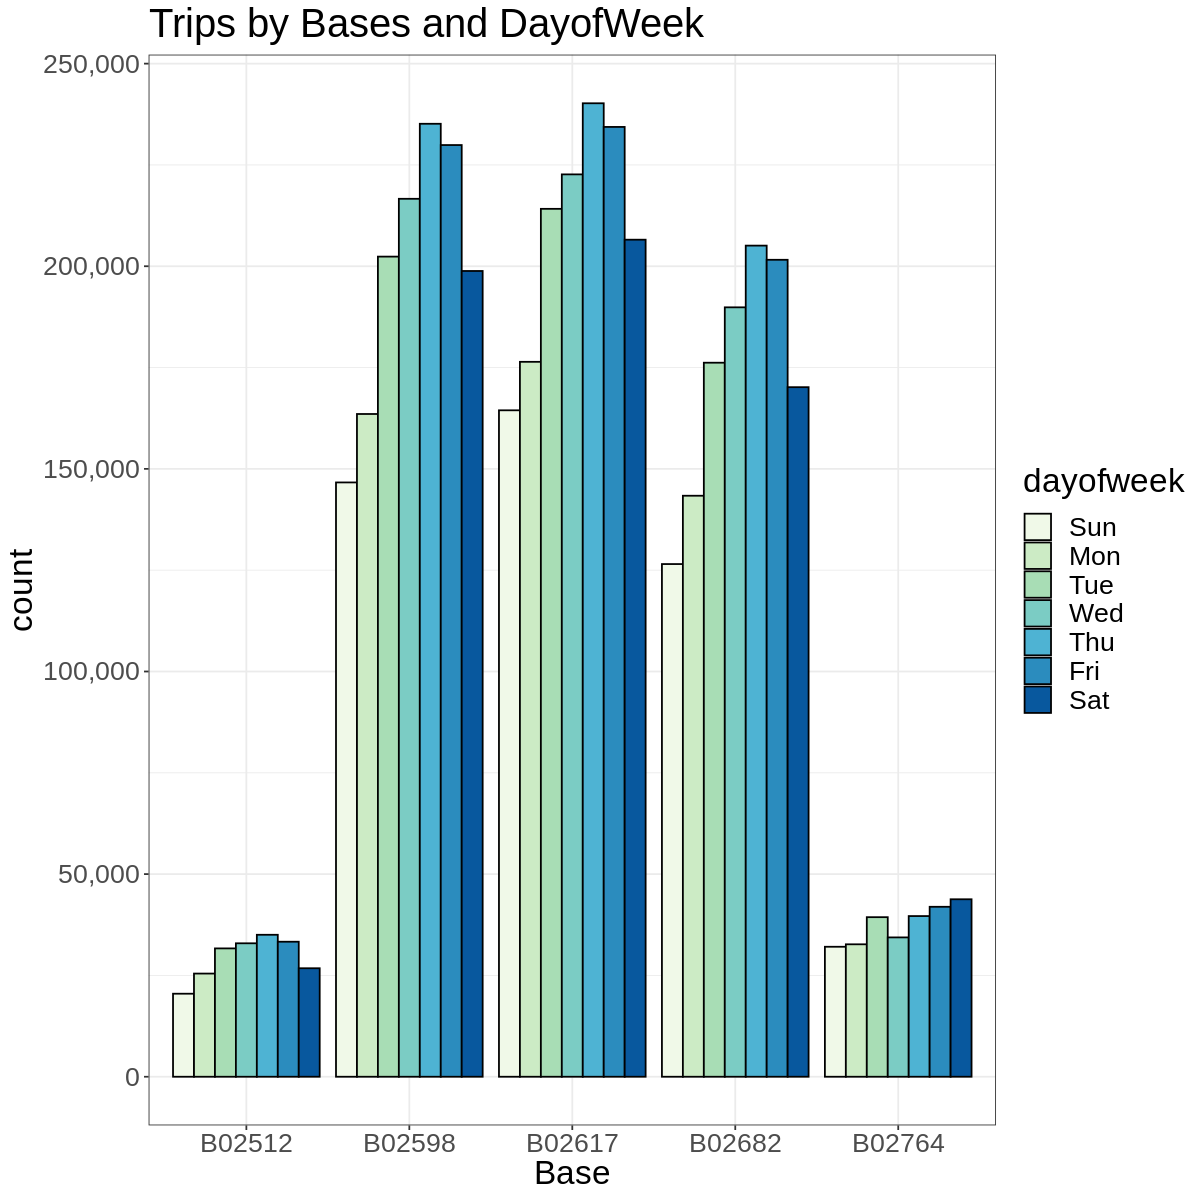

In [ ]:
fig(10,10)
ggplot(data_2014, aes(Base, fill=dayofweek)) +
geom_bar(position = "dodge", color ="black") + 
scale_y_continuous(labels = comma) +
ggtitle("Trips by Bases and DayofWeek") +
theme_bw() +
theme(text = element_text(size = 20)) +
scale_fill_manual(values = brewer.pal(n=7, name="GnBu"))

## Heatmap visualization of day, hour and month

In [ ]:
day_and_hour <- data_2014 %>% group_by(day, hour) %>% dplyr::summarize(Total = n())

`summarise()` has grouped output by 'day'. You can override using the `.groups` argument.



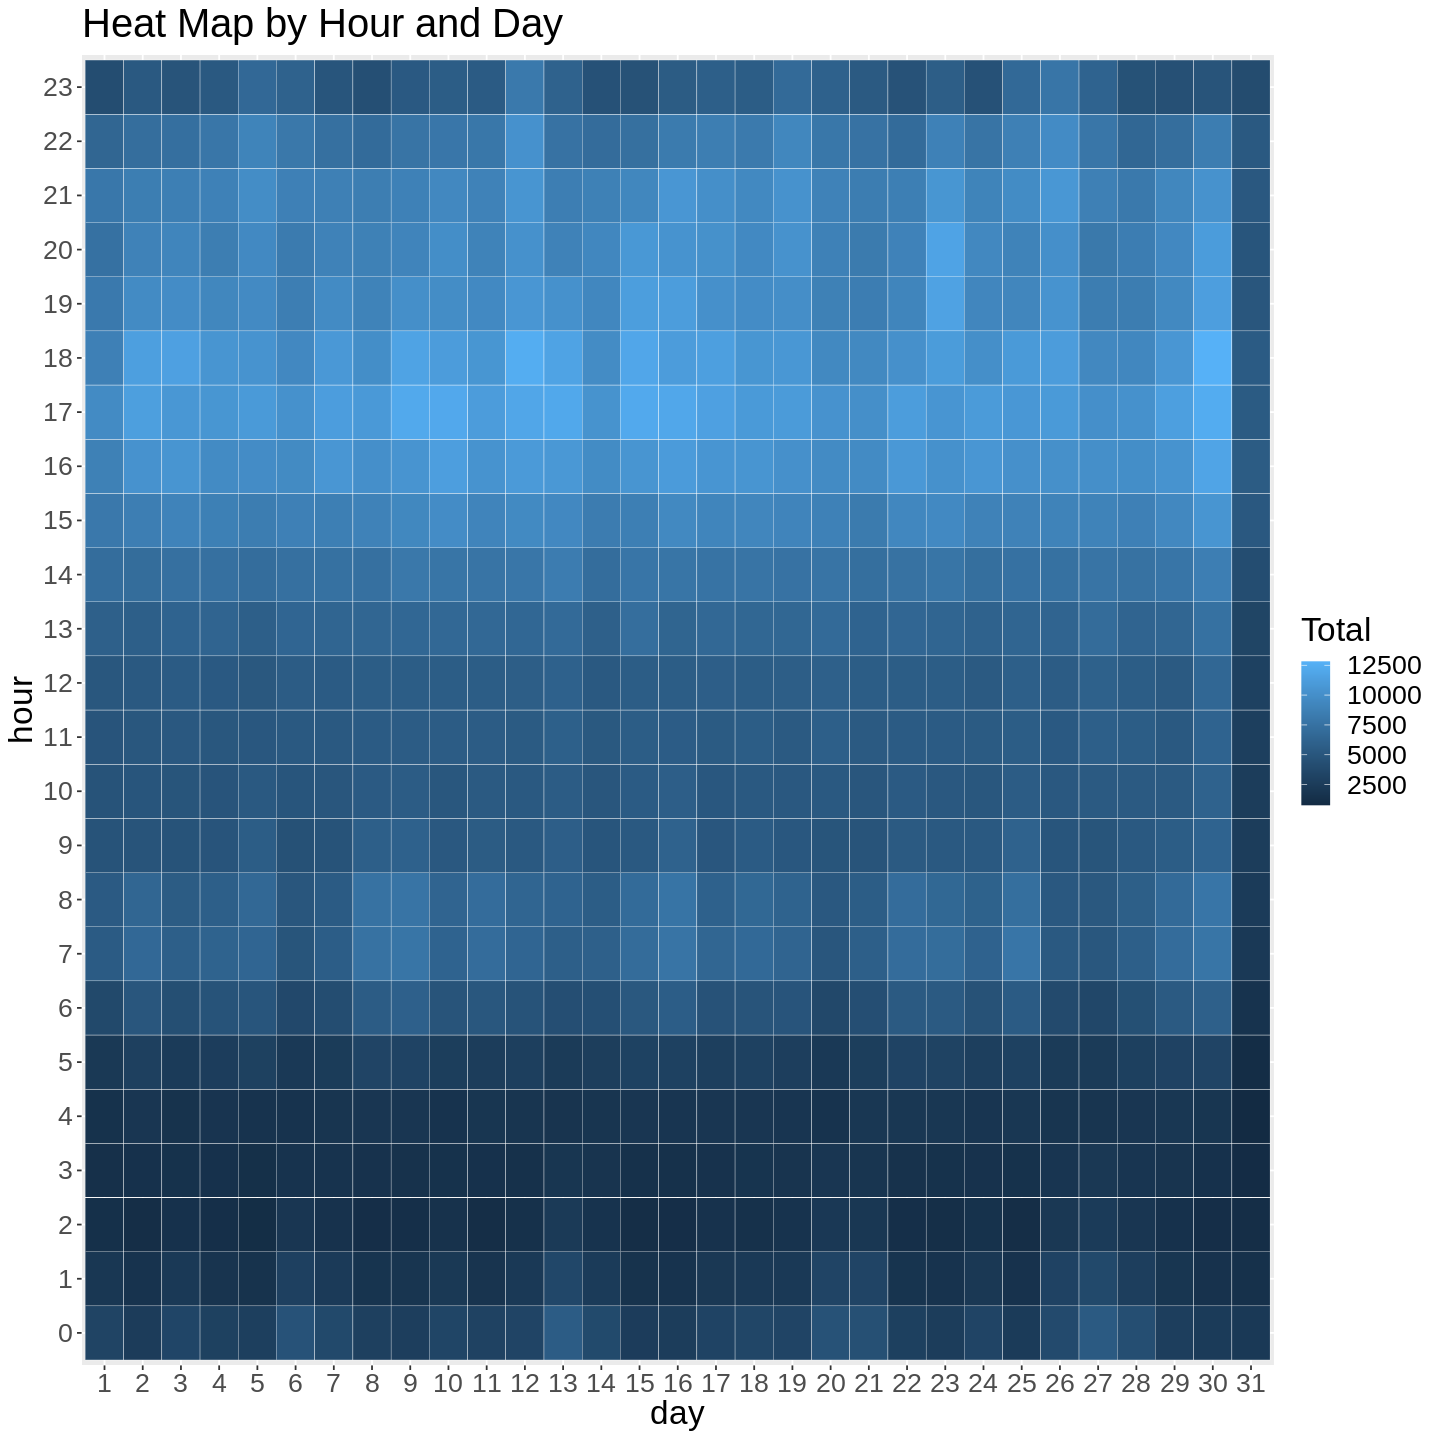

In [ ]:
fig(12,12)
ggplot(day_and_hour, aes(day, hour, fill = Total)) +
geom_tile(color = "white")+
ggtitle("Heat Map by Hour and Day") +
theme(text = element_text(size=20)) 

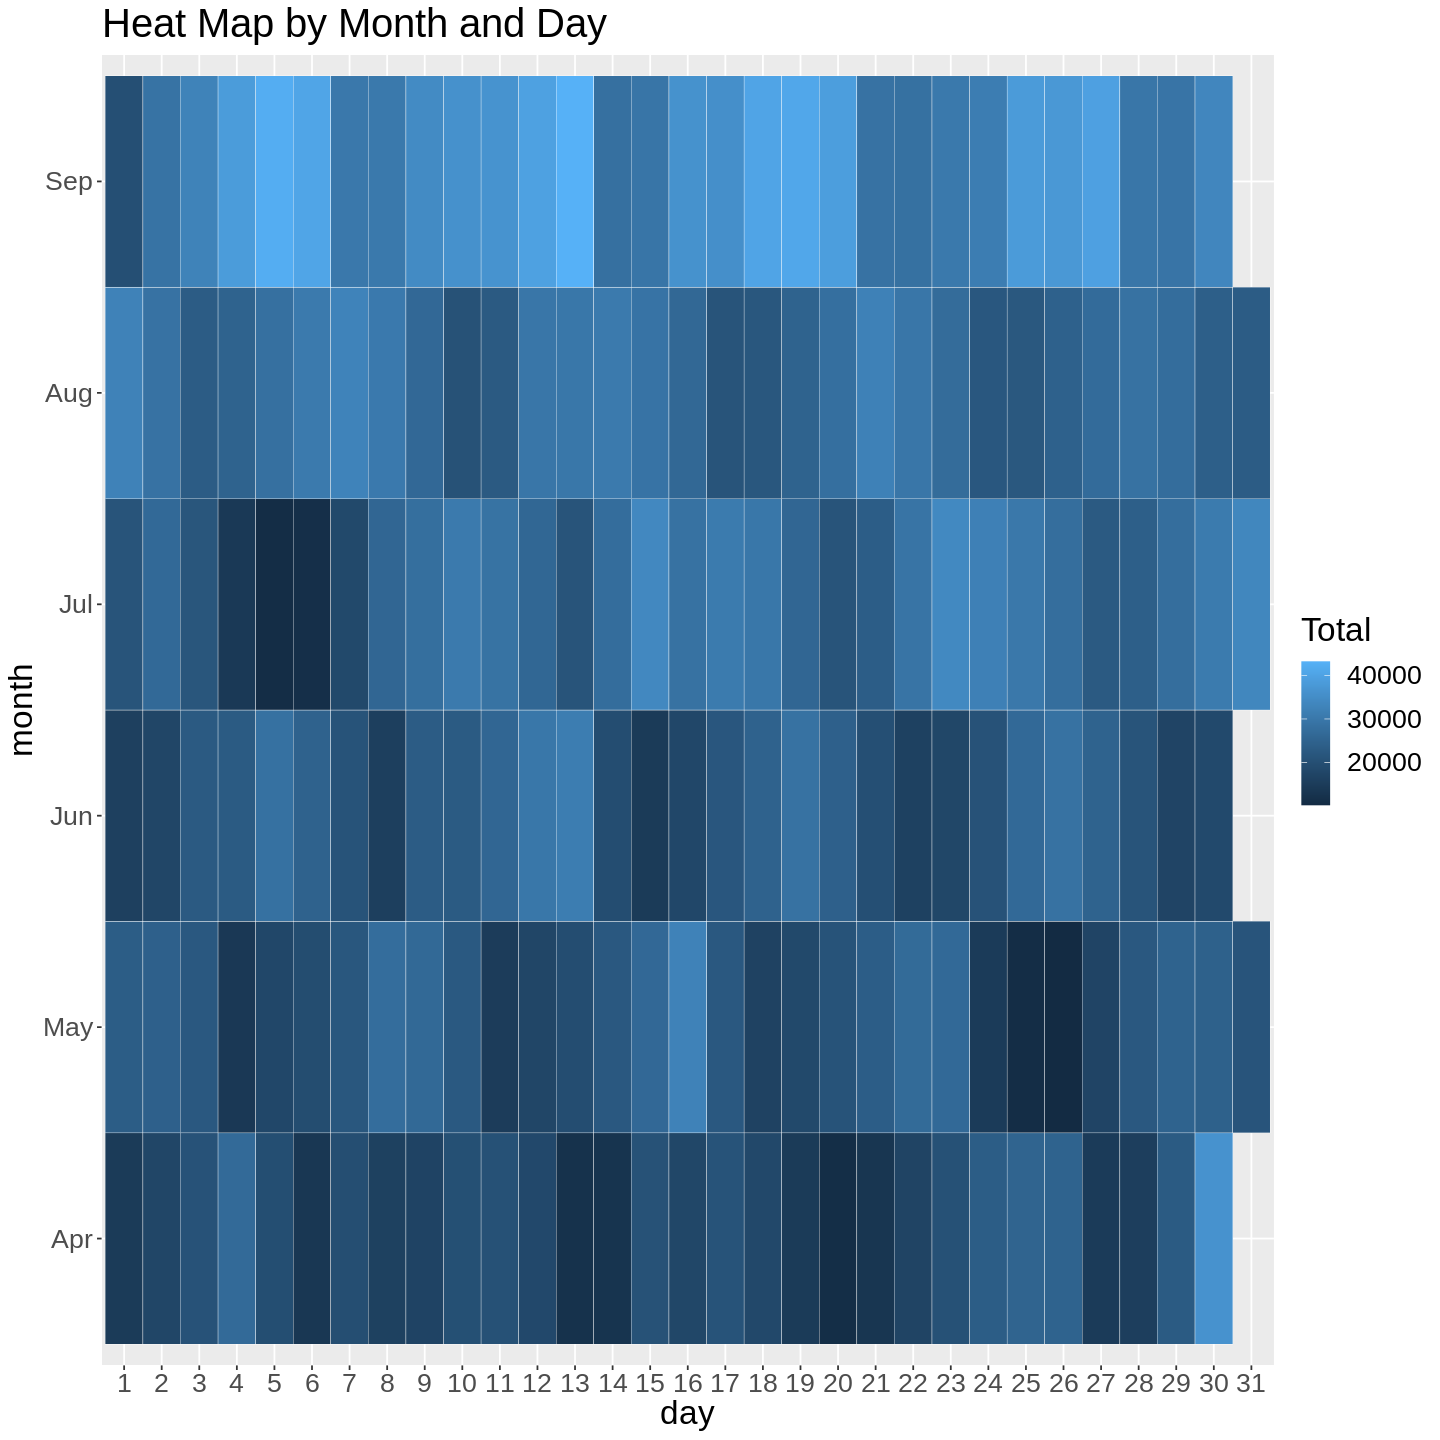

In [ ]:
fig(12,12)
ggplot(day_month_group, aes(day, month, fill=Total)) +
geom_tile(color = "white")+
ggtitle("Heat Map by Month and Day")+
theme(text = element_text(size =20))

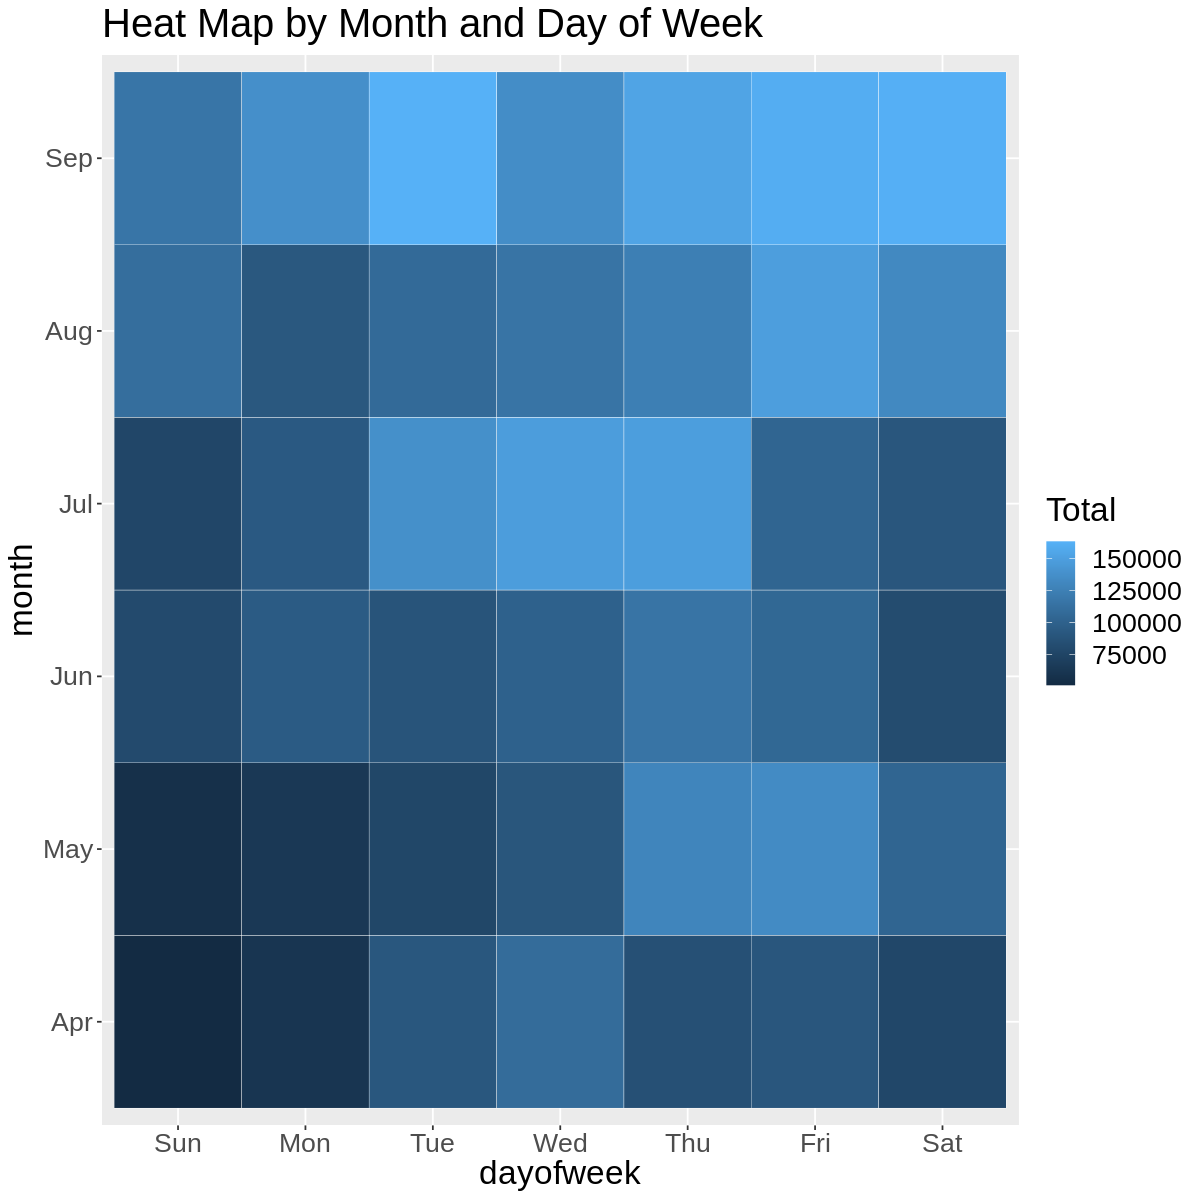

In [ ]:
fig(10,10)
ggplot(month_weekday, aes(dayofweek, month, fill=Total)) +
geom_tile(color = "white") +
ggtitle("Heat Map by Month and Day of Week") +
theme(text = element_text(size = 20))

In [ ]:
month_base <- data_2014 %>% group_by(Base, month) %>% dplyr::summarize(Total = n())
dayOfweek_bases <- data_2014 %>% group_by(Base, dayofweek) %>% dplyr::summarize(Total = n())

`summarise()` has grouped output by 'Base'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'Base'. You can override using the `.groups` argument.



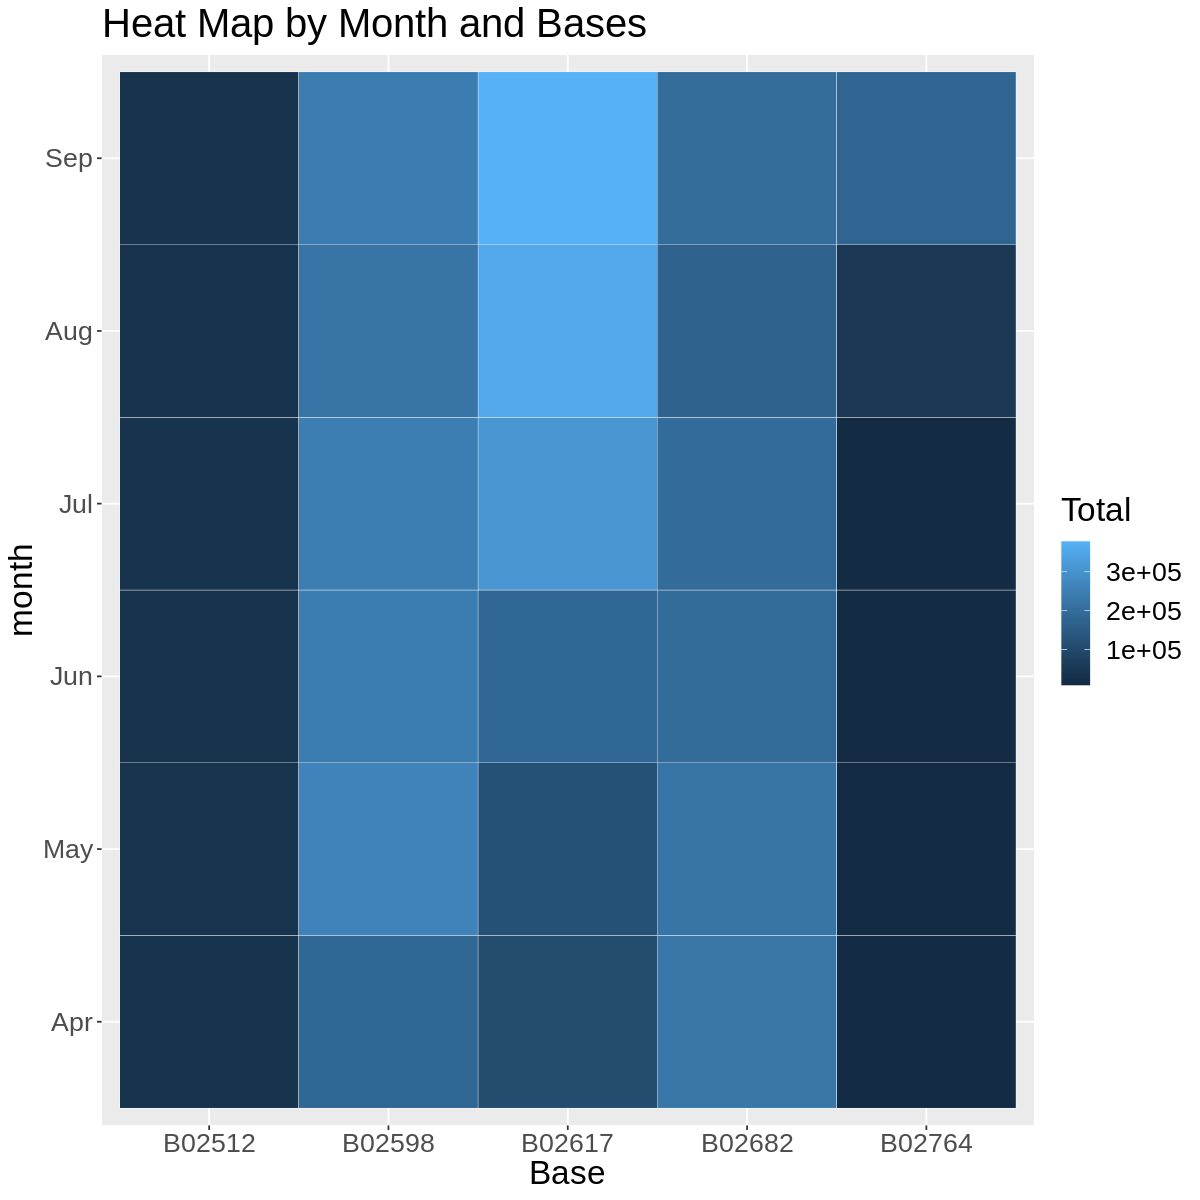

In [ ]:
fig(10,10)
ggplot(month_base, aes(Base, month, fill = Total)) +
geom_tile(color = "white") +
ggtitle("Heat Map by Month and Bases") + 
theme(text = element_text(size = 20))

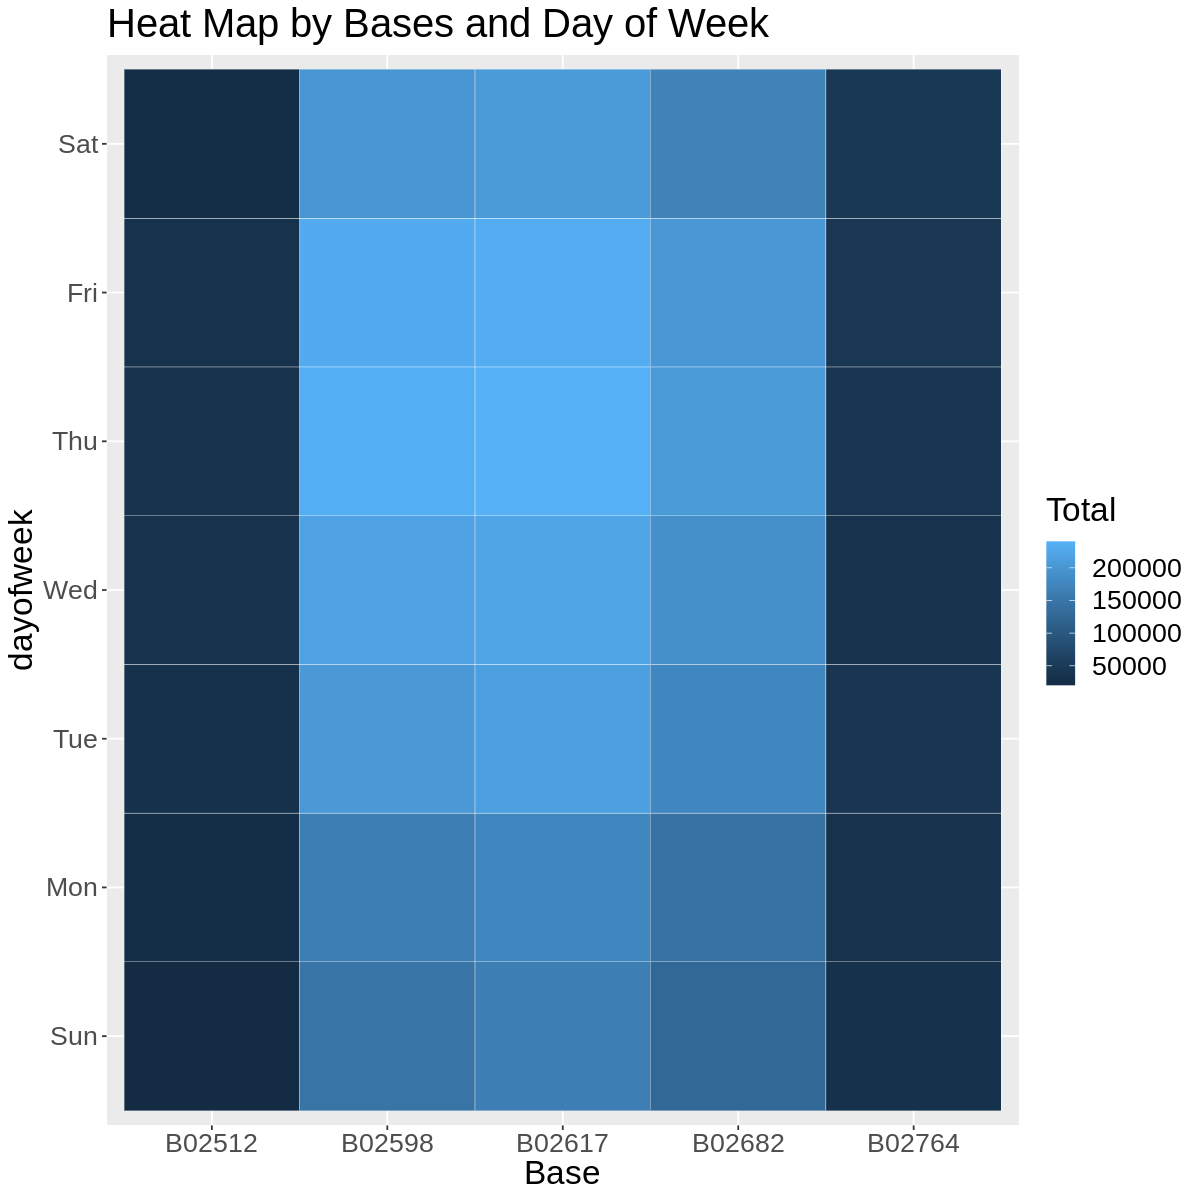

In [ ]:
fig(10,10)
ggplot(dayOfweek_bases, aes(Base, dayofweek, fill=Total)) +
geom_tile(color = "white") + 
ggtitle("Heat Map by Bases and Day of Week") +
theme(text = element_text(size = 20))

## Map visualization of rides in New York

In [ ]:
min_lat <- 40.5774
max_lat <- 40.9176
min_long <- -74.15
max_long <- -73.7004

Warning message:
“Removed 71701 rows containing missing values (geom_point).”


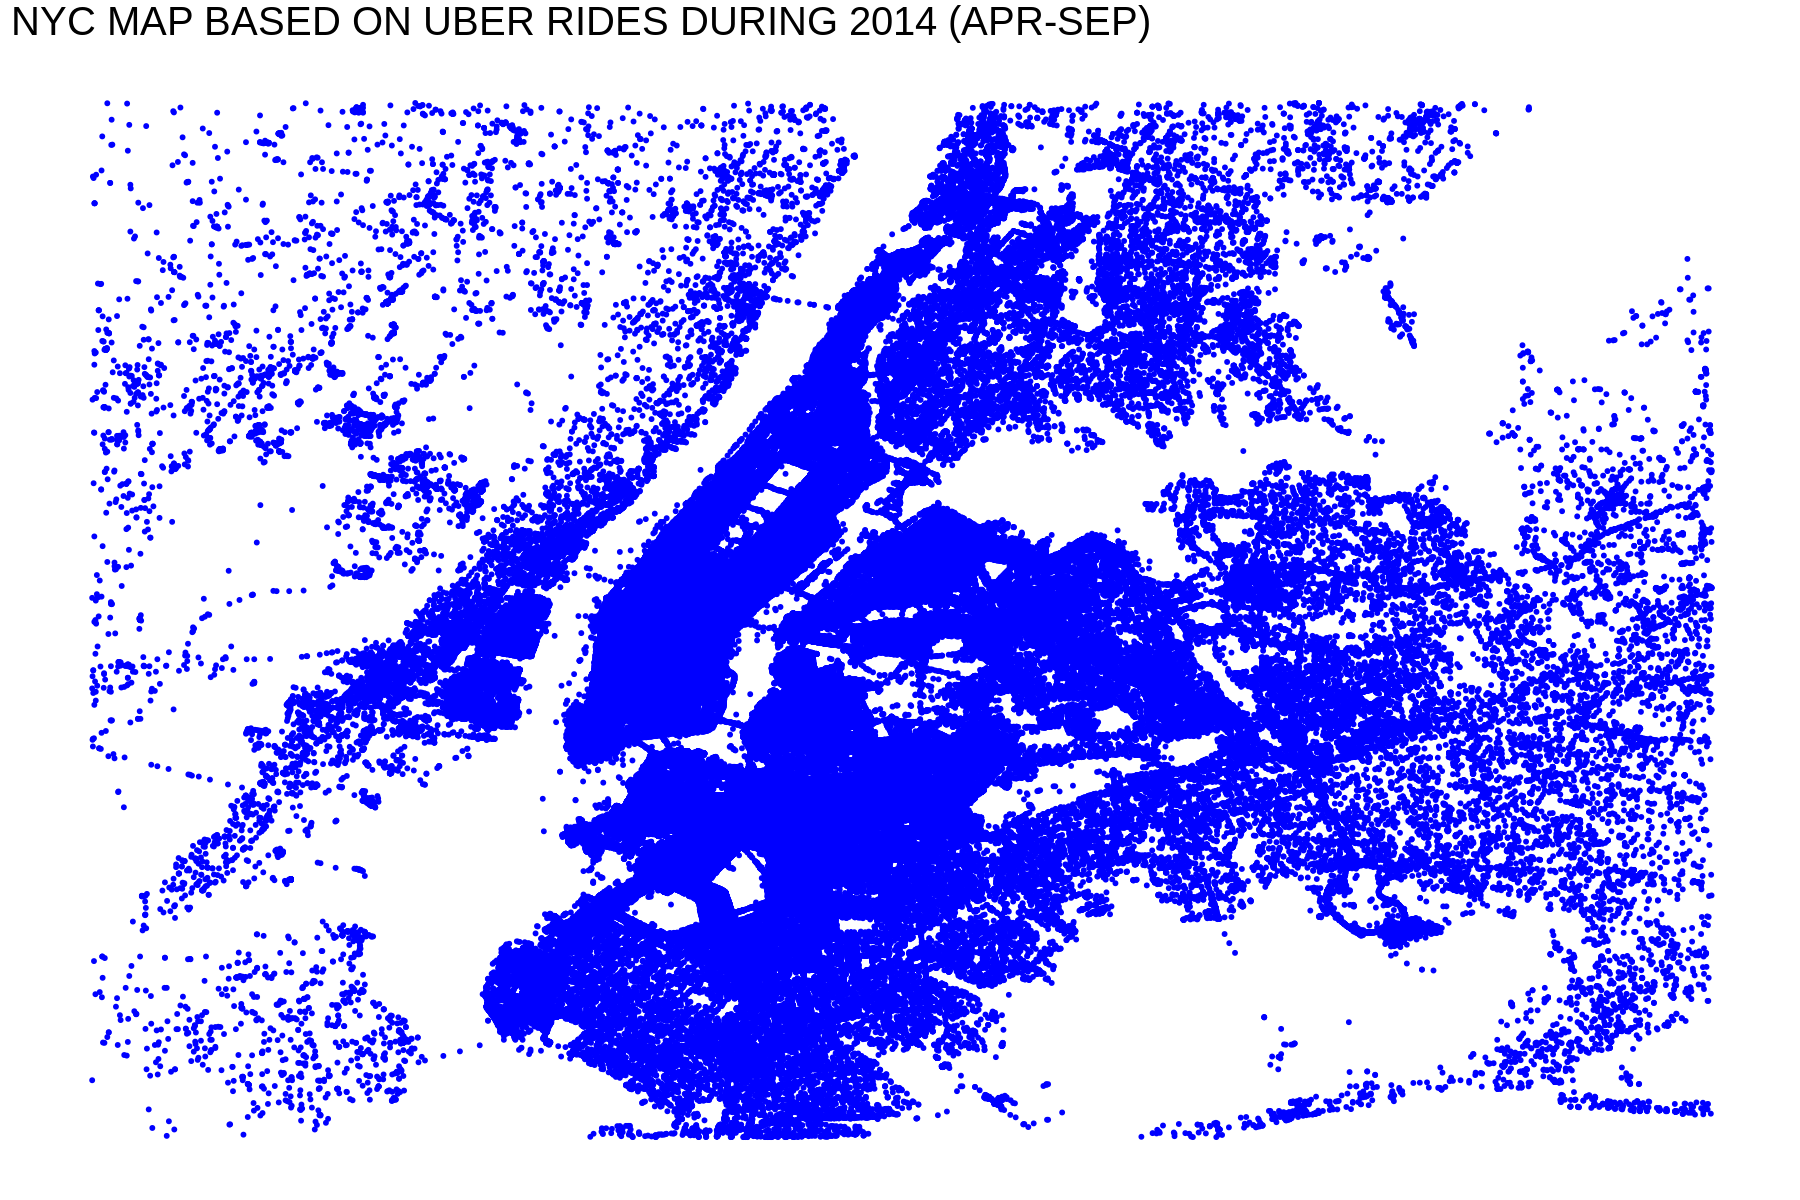

In [ ]:
fig(15,10)
ggplot(data_2014, aes(x = Lon, y = Lat)) +
geom_point(size=1, color = "blue") +
scale_x_continuous(limits =c(min_long, max_long)) +
scale_y_continuous(limits = c(min_lat, max_lat)) +
theme_map() +
theme(text = element_text(size = 20)) +
ggtitle("NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP)") +

In [ ]:
fig(15,10)
ggplot(data_2014, aes(x=Lon, y=Lat, color=Base))+
geom_point(size=1)+
scale_x_continuous(limits=c(min_long, max_long))+
scale_y_continuous(limits=c(min_lat, max_lat))+
theme_map()+
theme(text = element_text(size = 20)) +
ggtitle("NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP) by BASE") 

Output hidden; open in https://colab.research.google.com to view.